# 14.5 2012년 연방선거관리위원회 데이터베이스

In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [2]:
# 미국연방선거관리위원회는 정치활동 후원금에 대한 데이터를 공개했다.
# 이 데이터에는 기부자의 이름, 직업, 고용형태, 주소, 기부금액이 포함되어 있다.
# 그중 재밌는 데이터는 2012년 미국 대통령 선거 데이터다. 
# 2012년 6월에 내려받은 모든 주를 포함하는 전체 데이터는 150메가바이트의 CSV 파일로 파일 이름은 P00000001-ALL.csv이며 pandas.read_csv 함수로 불러올 수 있다.

In [4]:
fec = pd.read_csv("example_data/P00000001-ALL.csv")

C:\Users\ahnjh\AppData\Local\Temp\ipykernel_47152\2667724823.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec = pd.read_csv("example_data/P00000001-ALL.csv")


In [5]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [6]:
# DataFrame에는 다음과 같은 형태로 저장되어있다.

In [7]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [8]:
# 기부자와 선거자금에서 찾을 수 있는 패턴에 대한 통계를 추출하기 위해 이 데이터를 적당한 크기로 쪼개서 나누는 다양한 방법을 떠올릴 수 있을 것이다.
# 지금까지 배운 내용을 적용한 여러 가지 분석 방법을 살펴보자.

In [9]:
# 여기에는 정당 가입 여부에 대한 데이터가 없으므로 추가해주는 것이 유용하다. 
# unique 메서드를 이용해서 모든 정당의 후보 목록을 얻자.

In [12]:
unique_cands = fec.cand_nm.unique()

In [13]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [14]:
unique_cands[2]

'Obama, Barack'

In [15]:
# 소속 정당은 dict를 사용해서 표시할 수 있다.

In [16]:
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt":"Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, CHarles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

In [17]:
# 이제 이 사전 정보와 Series 객체의 map 메서드를 사용해 후보 이름으로부터 정당 배열을 계산해낼 수 있다.

In [18]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [19]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [21]:
# party 컬럼으로 추가
fec["party"] = fec.cand_nm.map(parties)

In [22]:
fec["party"].value_counts()

Democrat      593746
Republican    402065
Name: party, dtype: int64

In [23]:
# 분석을 하기 전에 데이터를 다듬어야 한다.
# 이 데이터에는 기부금액과 환급금액(기부금액이 마이너스인 경우)이 함께 포함되어 있다.

In [24]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [25]:
# 분석을 단순화하기 위해 기부금액이 양수인 데이터만 골라내겠다.

In [26]:
fec = fec[fec.contb_receipt_amt > 0]

In [27]:
# 버락 오바마와 미트 롬니가 양대 후보이므로 이 두 후보의 기부금액 정보만 따로 추려내겠다.

In [28]:
fec_mrbo = fec[fec.cand_nm.isin(["Obama, Barack", "Romney, Mitt"])]

- 14.5.1 직업 및 고용주에 따른 기부 통계

In [29]:
# 직업에 따른 기부 내역 통계는 흔한 조사 방법이다.
# 예를 들어 변호사는 민주당에 더 많은 돈을 기부하는 경향이 있으며 기업 임원은 공화당에 더 많은 돈을 기부하는 경향이 있다.
# 하지만 그래도 받아들이기보단 데이터를 통해 직접 확인해보자. 직업별 전체 기부 숫자는 쉽게 구할 수 있다.

In [30]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [31]:
# 내용을 보면 일반적인 직업 유형이거나 같은 유형이지만 다른 이름으로 많은 결과가 포함되어 있음을 알 수 있다.
# 아래 코드를 이용해서 하나의 직업을 다른 직업으로 매핑함으로써 이런 몇몇 문제를 제거하자. 
# dict.get을 사용하는 "꼼수"를 써서 매핑 정보가 없는 직업은 그대로 사용한다.

In [32]:
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

In [33]:
# 고용주에 대해서도 마찬가지로 처리하자

In [34]:
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

f = lambda x: emp_mapping.get(x, x)
fec["contbr_employer"] = fec["contbr_employer"].map(f)

In [35]:
# 이제 pivot_table을 사용해서 정당과 직업별로 데이터를 집계한 다음 최소 2백만불 이상 기부한 직업만 골라내자.

In [36]:
by_occupation = fec.pivot_table("contb_receipt_amt", 
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")

In [37]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [38]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7462058.31
CEO,2074974.79,4208950.52
CONSULTANT,2459912.71,2538990.45
ENGINEER,951525.55,1811937.30
EXECUTIVE,1355161.05,4136400.09
HOMEMAKER,4248875.80,13625600.78
INVESTOR,884133.00,2431258.92
LAWYER,3160478.87,391124.32
MANAGER,762883.22,1441092.37


In [39]:
# 이런 종류의 데이터는 막대그래프("barh"는 수평막대그래프를 의미한다)로 시각화하는 편이 보기 좋다(그림 14-12).

<AxesSubplot: ylabel='contbr_occupation'>

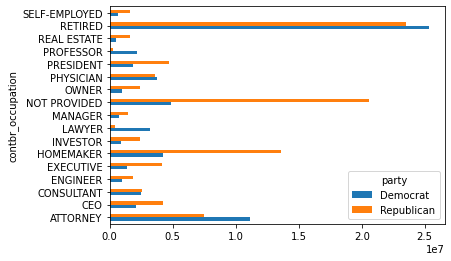

In [40]:
over_2mm.plot(kind="barh")

In [41]:
# 오바마 후보와 롬니 후보별로 가장 많은 금액을 기부한 직군을 알아보자.
# 이 통계를 구하려면 후보 이름으로 그룹을 묶고 이 장의 앞에서 사용했던 변형된 top 메서드를 사용하면 된다.

In [42]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

In [43]:
# 그리고 직업과 고용주에 따라 집계하면 된다.

In [44]:
grouped = fec_mrbo.groupby("cand_nm")

In [45]:
grouped.apply(get_top_amounts, "contbr_occupation", n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [46]:
grouped.apply(get_top_amounts, "contbr_employer", n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

- 14.5.2 기부금액

In [47]:
# 이 데이터를 효과적으로 분석하는 방법은 cut 함수를 사용해서 기부 규모별로 버킷을 만들어 기부자 수를 분할하는 것이다.

In [48]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])

In [49]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [50]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [51]:
# 이제 이 데이터를 이름과 버킷 이름으로 그룹지어 기부금액 규모에 따른 히스토그램 그릴 수 있다.

In [52]:
grouped = fec_mrbo.groupby(["cand_nm", labels])

In [54]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [55]:
# 이 데이터를 보면 오바마는 롬니보다 적은 금액의 기부를 훨씬 많이 받았다.
# 기부 금액을 모두 더한 후 버킷별로 정규화해서 후보별 전체 기부금액 대비 비율을 시각화할 수 있다(그림 14-13).

In [56]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [57]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [58]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<AxesSubplot: ylabel='contb_receipt_amt'>

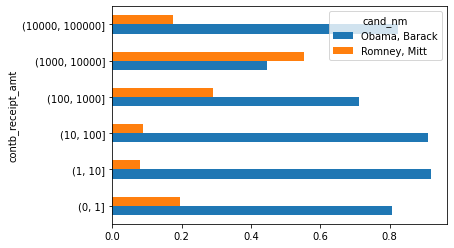

In [59]:
normed_sums[:-2].plot(kind="barh")

In [60]:
# 기부금액 순에서 가장 큰 2개의 버킷은 개인 후원이 아니므로 그래프에서 제외시켰다.

In [61]:
# 물론 지금 살펴본 분석은 좀 더 개량할 수 있다.
# 예를 들어 기부자의 이름과 우편번호를 이용해서 적은 금액을 자주 기부한 사람과 큰 금액을 기부한 사람별로 데이터를 집계할 수도 있을 것이다.

-14.5.3 주별 기부 통계

In [62]:
# 데이터를 후보자와 주별로 집계한다.

In [63]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])

In [64]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [65]:
totals = totals[totals.sum(1) > 100000]

In [66]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [67]:
# 각 로우를 전체 기부금액으로 나누면 각 후보에 대한 주별 전체 기부금액의 상대적인 비율을 얻을 수 있다.

In [68]:
percent = totals.div(totals.sum(1), axis=0)

In [69]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
